BUILDING BLOOD PRESSURE PREDICTION MODEL(USING SUPPORT VECTOR MACHINE)

##### importing the required dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler

what the folloiwng dependencies are used for in this project
1. pandas: data manipulations
2. nuumpy: python library for carrying out Algebraic/statistical expressions. 
3. seaborn and matplotlib : python library for data visualization.
4. train_test_split: this is used when splitting data set into train and test data.
5. accuracy score : metrics used in carrying out model performance evaluation by checking model accuracy.
6. svm : support vector machine is a machine learning algorithm that is used for solving classification and regression task. however in this project we will employ support vector classifier in making the prediction since target variable binary classification problems.

In [3]:
# loading the blood pressure dataset
df = pd.read_csv('/Users/macbook/Documents/Blood Pressure Dataset.csv')
df


,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,result
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1,0
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0,1
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0,1
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1,0
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1,0


In [4]:
# checking for the numbers of rows in the dataset
len(df)

2000

In [5]:
# checking for the numbers of rows and columns in the dataset
df.shape

(2000, 16)

### Exploratory Data Analysis
this is process of exploring the entire dataset to uncover hidden information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

#### explaining the result from info function
after using the info function on the data frame we can clearly see that a complete summary of the no of series are 
presented ranging from 0-15, also uncovered information about missing values in 3 column. which are:Pregnancy,alcohol_consumption_per_day
Genetic_Pedigree_Coefficient, the info function also shows us the data type of each series within the data set.
the total memory that the dataset is occupying is 250.1 KB.

In [7]:
# checking for statistical information about numerical series
df.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,result
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.0000,2000.000000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.5050,0.443500,0.479500
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.5001,0.496922,0.499705
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.0000,0.000000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.0000,0.000000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,1.0000,0.000000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.0000,1.000000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.0000,1.000000,1.000000


In [8]:
df['Patient_Number'].mean()

1000.5

## data preprocessing

In [9]:
#dealing with missing values in the dataset
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
result                              0
dtype: int64

In [10]:
#dealing with the missing values in the genetic_pedigree_coefficient
gpd_mean = df['Genetic_Pedigree_Coefficient'].mean().round(2)  #to round up
gpd_mean

0.49

In [11]:
#filling in the missing values in 'Genetic_Pedigree_Coefficient' using the computed meandf['Genetic_Pedigree_Coefficient'].fillna('gpd_mean')

df['Genetic_Pedigree_Coefficient'].fillna(gpd_mean)

0       0.90
1       0.23
2       0.91
3       0.43
4       0.83
        ... 
1995    0.02
1996    1.00
1997    0.22
1998    0.72
1999    0.09
Name: Genetic_Pedigree_Coefficient, Length: 2000, dtype: float64

In [18]:
#making the main dataset to be equal to the filled rows result
df['Genetic_Pedigree_Coefficient']=df['Genetic_Pedigree_Coefficient'].fillna(gpd_mean)

In [19]:
#to check if there is still missing values in the column 
df['Genetic_Pedigree_Coefficient'].isnull().sum()

0

In [20]:
#using a constant value to fill in the missing values within the pregnancy and alchol consumption colums
df[['Pregnancy','alcohol_consumption_per_day']].fillna(value=0)

,Pregnancy,alcohol_consumption_per_day
0,1.0,0.0
1,0.0,205.0
2,0.0,67.0
3,0.0,242.0
4,0.0,397.0
...,...,...
1995,0.0,144.0
1996,1.0,0.0
1997,0.0,0.0
1998,0.0,253.0


In [15]:
#making the main dataset to be equal to the filled rows result
df[['Pregnancy','alcohol_consumption_per_day']]=df[['Pregnancy','alcohol_consumption_per_day']].fillna(value=0)

In [16]:
#to check if there is still a missing value
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
result                           0
dtype: int64

In [17]:
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,result
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1,0
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0,1
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0,1
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.0,3,1,0,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,0.0,3,1,1,0
1997,1998,1,16.91,0.22,18,42,0,0.0,0,14933,24753,0.0,2,1,1,1
1998,1999,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.0,3,0,1,0


In [16]:
# checking how many smokers are in the dataset from those that do not smoke using groupby function
df.groupby(['Smoking','Sex'])['Smoking'].count()

Smoking  Sex
0        0      494
         1      487
1        0      514
         1      505
Name: Smoking, dtype: int64

<Axes: xlabel='Smoking', ylabel='count'>

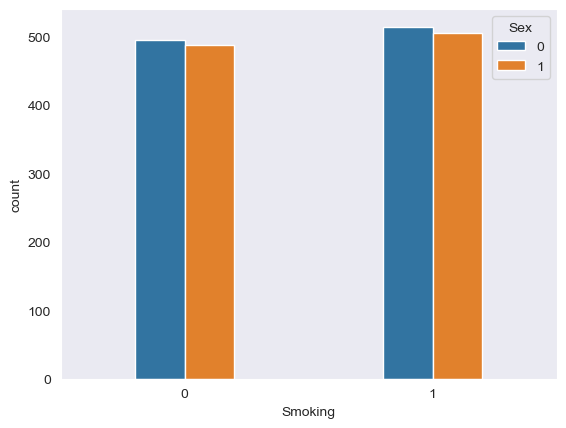

In [17]:
# carrying out Data visualization
sns.set_style('dark')
sns.countplot(x ='Smoking', hue='Sex', data=df,width=0.4)

In [18]:
df.head(20)

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,result
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,0.0,2,1,1,0
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0,1
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0,1
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0,0
5,6,0,11.64,0.54,23,48,0,0.0,1,27042,7513,0.0,3,0,0,1
6,7,1,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1,1
7,8,0,12.70,0.41,48,20,0,0.0,0,29781,26749,134.0,2,0,0,0
8,9,0,10.88,0.68,72,44,0,0.0,0,814,9607,99.0,3,0,0,1
9,10,1,14.56,0.61,40,44,0,0.0,0,1278,12715,95.0,2,0,0,0


In [71]:
#exploring the result column
df.groupby('result')['result'].count()   #the data is balanced

result
0    1041
1     959
Name: result, dtype: int64

In [19]:
#splitting the data set into two, into dependent variable(Y) and the independent variable(X)
x=df.drop('result', axis=1)
x

y=df['result']
y

0       0
1       1
2       0
3       1
4       0
       ..
1995    0
1996    0
1997    1
1998    0
1999    1
Name: result, Length: 2000, dtype: int64

In [21]:
# DATA standardization scaling the process of transforrming data points so that the system will see those data point
#to be on the same range. this is to prevent the model from giving prefrences to data point with higher values, than
#data point with smaller vaules

scaler = StandardScaler()   #the function that scales 
scaler.fit(x)  #to fit the dataset 

NameError: name 'x' is not defined

In [21]:
#transforming data
transformed_data = scaler.transform(x)
transformed_data

array([[-1.731185  ,  1.01308561, -0.19670848, ..., -0.01517697,
         0.9900495 ,  1.12017473],
       [-1.72945295, -0.98708341, -0.89656771, ...,  1.19898069,
        -1.0100505 , -0.89271787],
       [-1.7277209 ,  1.01308561, -0.4208464 , ..., -0.01517697,
         0.9900495 , -0.89271787],
       ...,
       [ 1.7277209 ,  1.01308561,  2.37859055, ..., -0.01517697,
         0.9900495 ,  1.12017473],
       [ 1.72945295, -0.98708341, -0.25617364, ...,  1.19898069,
        -1.0100505 ,  1.12017473],
       [ 1.731185  ,  1.01308561, -0.16011453, ..., -1.22933464,
         0.9900495 , -0.89271787]])

In [22]:
#splitting our dataset into training and testing data
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [23]:
#checking the given values of each splitted data
x_train.shape

(1600, 15)

In [24]:
x_test.shape

(400, 15)

In [25]:
y_test.shape

(400,)

In [26]:
y_train.shape

(1600,)

## model building phase

In [27]:
model = svm.SVC(kernel='poly')   #kernel is a method that is used for the algorithm

In [28]:
#training the support vector classifier
model.fit(x_train, y_train)

SVC(kernel='poly')

In [29]:
# pridicting the trained data 
x_train_prediction = model.predict(x_train)


x_train_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
#checking the accuracy score of the trained data
training_Data_Accuracy = accuracy_score(x_train_prediction, y_train)

training_Data_Accuracy

0.529375

In [31]:
# pridicting the test data 

x_test_prediction = model.predict(x_test)


x_test_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [32]:
#checking the accuracy score of the test data

test_data_acurracy = accuracy_score(x_test_prediction, y_test)


test_data_acurracy

0.485

### cross validation

In [33]:
#cross validation is a technique used to evaluate and validate if the model is working okay

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [34]:
#splitting our dataset into training and testing data
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [35]:
model = svm.SVC(kernel='poly')   #kernel is a method that is used for the algorithm

In [36]:
#training the support vector classifier
model.fit(x_train, y_train)

SVC(kernel='poly')

In [37]:
k = 5

In [38]:
kf = KFold(n_splits = k , shuffle= True , random_state =42)

kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [39]:
cv_scores = cross_val_score(model,x_train, y_train, cv =kf)

cv_scores.round(2)

array([0.59, 0.51, 0.52, 0.47, 0.55])

In [40]:
cv_scores.mean()

0.5275000000000001

## logistics regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
#splitting our dataset into training and testing data
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
# Initialize the logistic regression model
model = LogisticRegression()

In [44]:
# Train the model on the training data
model.fit(x_train, y_train)

LogisticRegression()

In [45]:
# predicting the trained data 
x_train_predict = model.predict(x_train)


x_train_predict

array([0, 1, 0, ..., 0, 0, 0])

In [46]:
#checking the accuracy score of the trained data
accuracy_trained_data = accuracy_score(x_train_predict,y_train)

print('The Accuracy Score of the trained data is:', accuracy_trained_data )

The Accuracy Score of the trained data is: 0.5375


In [47]:
# Make predictions on the test data
x_preditors = model.predict(x_test)

x_preditors

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [48]:
# Evaluate the model
accuracy = accuracy_score(x_preditors, y_test)

print('The Accuracy Score of the test data is:',accuracy )

The Accuracy Score of the test data is: 0.5175


###Developing the predictive system

In [64]:
input_data =(27,0,10.4,0.69,66,40,1,0,0,22277,14720,297,1,0,1)


In [65]:
# changing the input data to a numpy array
input_data_as_array =np.asarray(input_data)  #numpy function used to convert data point into an array


input_data_as_array

array([2.7000e+01, 0.0000e+00, 1.0400e+01, 6.9000e-01, 6.6000e+01,
       4.0000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.2277e+04,
       1.4720e+04, 2.9700e+02, 1.0000e+00, 0.0000e+00, 1.0000e+00])

In [66]:
# reshaping the arraay as we are predicting for one instance
input_data_reshape = (input_data_as_array.reshape(1,-1))


input_data_reshape

array([[2.7000e+01, 0.0000e+00, 1.0400e+01, 6.9000e-01, 6.6000e+01,
        4.0000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.2277e+04,
        1.4720e+04, 2.9700e+02, 1.0000e+00, 0.0000e+00, 1.0000e+00]])

In [67]:
# Standardizing the input data

std_data = scaler.transform(input_data_reshape)


print(std_data,'\n' )

[[-1.68615167 -0.98708341 -0.59924189  0.68593466  1.13669354  0.84353412
   1.00803226 -0.33240663 -1.01918398 -0.21249202 -0.71832749  0.48461778
  -1.22933464 -1.0100505   1.12017473]] 



/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [68]:
# Making the prediction
prediction = model.predict(std_data)


print(prediction)

[1]


/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
if(prediction[0]==0):
   print('The person is not having High blood pressure')
else:
  print('The person is having High blood pressure')


The person is having High blood pressure


In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

NameError: name 'confusion_matrix' is not defined

In [ ]:
classification_rep = classification_report(y_test, y_pred)

classification_rep